# Periods
In this project, we shall explore and analyse some data related to users' periods and symptoms from a period tracking app. Given below is a brief description of what the columns in the dataset represent:

- record_id: Unique ID of each record row
- user_id: Unique user ID
- acne, backache, bloating, cramp, diarrhea, dizzy, headache, mood, nausea, sore: Symptom name and user's scoring on severity of the symptom from 0 to 100 (with 0 being the least severe, and 100 being the most severe)
- date: Record creation date
- period_start_date: A record of the date a user's period started
- period_end_date: A record of the date a user's period ended

## Import libraries and set style

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[How to deal with SettingWithCopyWarning in Pandas](https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas)

In [2]:
# To disable the warning mentioned in the above link
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
import matplotlib as mpl

# To add edges between the entities in a visualisation
mpl.rcParams['patch.force_edgecolor'] = True

sns.set_style('darkgrid')

## Import datasets

In [4]:
periods = pd.read_excel('Period Symptom Data - Periods.xlsx')
periods.head()

,record_id,user_id,period_start_date,period_end_date
0,352,252,2015-05-04,2015-10-04
1,353,253,2015-03-23,2015-03-27
2,354,254,2015-06-04,2015-11-04
3,355,255,2015-03-21,2015-03-24
4,356,256,2015-03-26,2015-03-31


In [5]:
symptoms = pd.read_excel('Period Symptom Data - Symptoms.xlsx')
symptoms.head()

,record_id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date,Unnamed: 13,Unnamed: 14
0,127,252,0,0,0,0,0,0,0,0,0,0,2015-11-04,NaN,NaN
1,128,257,0,0,0,46,0,0,0,0,0,0,2015-10-04,NaN,NaN
2,129,257,0,0,0,0,0,27,48,0,0,0,2015-11-04,NaN,NaN
3,130,263,0,0,0,0,0,0,0,0,0,0,2015-11-04,NaN,NaN
4,132,269,0,0,0,0,0,0,0,0,0,0,2015-11-04,NaN,NaN


## Prepare the final dataset
Let's do some data cleaning and join the two dataframes before proceeding with data exploration.

In [6]:
periods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35942 entries, 0 to 35941
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   record_id          35942 non-null  int64         
 1   user_id            35942 non-null  int64         
 2   period_start_date  35939 non-null  datetime64[ns]
 3   period_end_date    32935 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 1.1 MB


In [7]:
symptoms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14512 entries, 0 to 14511
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   record_id    14512 non-null  int64         
 1   user_id      14512 non-null  int64         
 2   acne         14512 non-null  int64         
 3   backache     14512 non-null  int64         
 4   bloating     14512 non-null  int64         
 5   cramp        14512 non-null  int64         
 6   diarrhea     14512 non-null  int64         
 7   dizzy        14512 non-null  int64         
 8   headache     14512 non-null  int64         
 9   mood         14512 non-null  int64         
 10  nausea       14512 non-null  int64         
 11  sore         14512 non-null  int64         
 12  date         14512 non-null  datetime64[ns]
 13  Unnamed: 13  0 non-null      float64       
 14  Unnamed: 14  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), int64(12)
memory us

Let's remove the last two columns from the 'symptoms' dataframe.

In [8]:
last_2_columns = symptoms.columns[-2:]
last_2_columns

Index(['Unnamed: 13', 'Unnamed: 14'], dtype='object')

In [9]:
symptoms.drop(columns=last_2_columns, axis=1, inplace=True)
symptoms.head()

,record_id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,127,252,0,0,0,0,0,0,0,0,0,0,2015-11-04
1,128,257,0,0,0,46,0,0,0,0,0,0,2015-10-04
2,129,257,0,0,0,0,0,27,48,0,0,0,2015-11-04
3,130,263,0,0,0,0,0,0,0,0,0,0,2015-11-04
4,132,269,0,0,0,0,0,0,0,0,0,0,2015-11-04


Now, let's join the two dataframes on the 'record_id' column.

In [10]:
df = periods.merge(symptoms, on=['record_id'])
df.head()

,record_id,user_id_x,period_start_date,period_end_date,user_id_y,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,352,252,2015-05-04,2015-10-04,581,0,0,39,54,45,0,0,14,0,0,2015-11-09
1,353,253,2015-03-23,2015-03-27,591,0,0,0,0,0,0,0,0,0,55,2015-12-09
2,354,254,2015-06-04,2015-11-04,587,0,0,0,0,0,0,0,16,0,0,2015-12-09
3,355,255,2015-03-21,2015-03-24,622,29,99,27,0,0,78,36,0,65,100,2015-12-09
4,356,256,2015-03-26,2015-03-31,622,51,100,27,0,0,75,28,0,70,100,2015-11-09


Since it is anonymized data, we won't gain any valuable insights from the user ids, so let's remove these.

In [11]:
df.drop(columns=['user_id_x', 'user_id_y'], axis=1, inplace=True)
df.head()

,record_id,period_start_date,period_end_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,352,2015-05-04,2015-10-04,0,0,39,54,45,0,0,14,0,0,2015-11-09
1,353,2015-03-23,2015-03-27,0,0,0,0,0,0,0,0,0,55,2015-12-09
2,354,2015-06-04,2015-11-04,0,0,0,0,0,0,0,16,0,0,2015-12-09
3,355,2015-03-21,2015-03-24,29,99,27,0,0,78,36,0,65,100,2015-12-09
4,356,2015-03-26,2015-03-31,51,100,27,0,0,75,28,0,70,100,2015-11-09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12653 entries, 0 to 12652
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   record_id          12653 non-null  int64         
 1   period_start_date  12650 non-null  datetime64[ns]
 2   period_end_date    11725 non-null  datetime64[ns]
 3   acne               12653 non-null  int64         
 4   backache           12653 non-null  int64         
 5   bloating           12653 non-null  int64         
 6   cramp              12653 non-null  int64         
 7   diarrhea           12653 non-null  int64         
 8   dizzy              12653 non-null  int64         
 9   headache           12653 non-null  int64         
 10  mood               12653 non-null  int64         
 11  nausea             12653 non-null  int64         
 12  sore               12653 non-null  int64         
 13  date               12653 non-null  datetime64[ns]
dtypes: dat

Let's remove any null values. Note that we won't be losing a large amount of data where some column may be null for the row to be dropped.

In [13]:
df.dropna(inplace=True)
df

,record_id,period_start_date,period_end_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date
0,352,2015-05-04,2015-10-04,0,0,39,54,45,0,0,14,0,0,2015-11-09
1,353,2015-03-23,2015-03-27,0,0,0,0,0,0,0,0,0,55,2015-12-09
2,354,2015-06-04,2015-11-04,0,0,0,0,0,0,0,16,0,0,2015-12-09
3,355,2015-03-21,2015-03-24,29,99,27,0,0,78,36,0,65,100,2015-12-09
4,356,2015-03-26,2015-03-31,51,100,27,0,0,75,28,0,70,100,2015-11-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12648,13724,2016-07-09,2016-09-13,0,0,51,0,0,30,71,0,44,73,2019-03-20
12649,13731,2016-06-20,2016-06-25,0,0,0,0,0,0,36,0,0,13,2019-03-22
12650,13731,2016-06-20,2016-06-25,0,0,0,0,0,0,36,0,0,13,2019-03-22
12651,13732,2016-07-21,2016-07-26,0,0,0,68,0,0,0,0,0,0,2019-03-22


Finally, our dataset looks fit for exploration and analysis. Let's proceed with feature creation.

## Data exploration
It would be better to look at days, months and years instead of just dates. We will also create a feature to determine the period duration (period_end_date - period_start_date).

### Feature creation - I

In [14]:
df['period_end_date'] - df['period_start_date']

0       153 days
1         4 days
2       153 days
3         3 days
4         5 days
          ...   
12648    66 days
12649     5 days
12650     5 days
12651     5 days
12652     5 days
Length: 11725, dtype: timedelta64[ns]

In [15]:
df['period_duration'] = df['period_end_date'] - df['period_start_date']
df.head()

,record_id,period_start_date,period_end_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date,period_duration
0,352,2015-05-04,2015-10-04,0,0,39,54,45,0,0,14,0,0,2015-11-09,153 days
1,353,2015-03-23,2015-03-27,0,0,0,0,0,0,0,0,0,55,2015-12-09,4 days
2,354,2015-06-04,2015-11-04,0,0,0,0,0,0,0,16,0,0,2015-12-09,153 days
3,355,2015-03-21,2015-03-24,29,99,27,0,0,78,36,0,65,100,2015-12-09,3 days
4,356,2015-03-26,2015-03-31,51,100,27,0,0,75,28,0,70,100,2015-11-09,5 days


In [16]:
df['period_duration']

0       153 days
1         4 days
2       153 days
3         3 days
4         5 days
          ...   
12648    66 days
12649     5 days
12650     5 days
12651     5 days
12652     5 days
Name: period_duration, Length: 11725, dtype: timedelta64[ns]

In [17]:
df['period_duration'][0]

Timedelta('153 days 00:00:00')

Let's extract just the number from the above value after converting it to a string.

In [18]:
str(df['period_duration'][0])

'153 days 00:00:00'

In [19]:
str(df['period_duration'][0]).split()[0]

'153'

In [20]:
float(str(df['period_duration'][0]).split()[0])

153.0

Now, let's perform the above operations on the 'period_duration' column.

In [21]:
df['period_duration'] = df['period_duration'].apply(lambda x: int(str(x).split()[0]))
df['period_duration']

0        153
1          4
2        153
3          3
4          5
        ... 
12648     66
12649      5
12650      5
12651      5
12652      5
Name: period_duration, Length: 11725, dtype: int64

Now, we can convert the 'period_duration' values from string to integer.

In [22]:
df.head()

,record_id,period_start_date,period_end_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date,period_duration
0,352,2015-05-04,2015-10-04,0,0,39,54,45,0,0,14,0,0,2015-11-09,153
1,353,2015-03-23,2015-03-27,0,0,0,0,0,0,0,0,0,55,2015-12-09,4
2,354,2015-06-04,2015-11-04,0,0,0,0,0,0,0,16,0,0,2015-12-09,153
3,355,2015-03-21,2015-03-24,29,99,27,0,0,78,36,0,65,100,2015-12-09,3
4,356,2015-03-26,2015-03-31,51,100,27,0,0,75,28,0,70,100,2015-11-09,5


Now, let's have a deeper look at the values of 'period_duration'.

In [23]:
df['period_duration'].value_counts().sort_index()

-340     1
-323     1
-322     2
-321     3
-320    13
        ..
 280     1
 305     1
 322     1
 345     1
 351     1
Name: period_duration, Length: 262, dtype: int64

[Generally, a period lasts from 2 to 8 days.](https://www.healthline.com/health/how-long-does-your-period-last) Let's remove all other values for period_duration.

In [24]:
df = df[(df['period_duration'] >= 2) & (df['period_duration'] <= 8)]
df

,record_id,period_start_date,period_end_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date,period_duration
1,353,2015-03-23,2015-03-27,0,0,0,0,0,0,0,0,0,55,2015-12-09,4
3,355,2015-03-21,2015-03-24,29,99,27,0,0,78,36,0,65,100,2015-12-09,3
4,356,2015-03-26,2015-03-31,51,100,27,0,0,75,28,0,70,100,2015-11-09,5
11,363,2015-03-13,2015-03-17,0,0,0,0,0,0,0,0,0,0,2015-09-13,4
16,368,2015-03-17,2015-03-24,0,0,0,0,0,0,0,0,0,0,2015-10-09,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12644,13722,2016-09-16,2016-09-23,0,0,28,0,0,0,0,17,0,38,2019-03-20,7
12649,13731,2016-06-20,2016-06-25,0,0,0,0,0,0,36,0,0,13,2019-03-22,5
12650,13731,2016-06-20,2016-06-25,0,0,0,0,0,0,36,0,0,13,2019-03-22,5
12651,13732,2016-07-21,2016-07-26,0,0,0,68,0,0,0,0,0,0,2019-03-22,5


In [25]:
df.reset_index(drop=True, inplace=True)
df

,record_id,period_start_date,period_end_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date,period_duration
0,353,2015-03-23,2015-03-27,0,0,0,0,0,0,0,0,0,55,2015-12-09,4
1,355,2015-03-21,2015-03-24,29,99,27,0,0,78,36,0,65,100,2015-12-09,3
2,356,2015-03-26,2015-03-31,51,100,27,0,0,75,28,0,70,100,2015-11-09,5
3,363,2015-03-13,2015-03-17,0,0,0,0,0,0,0,0,0,0,2015-09-13,4
4,368,2015-03-17,2015-03-24,0,0,0,0,0,0,0,0,0,0,2015-10-09,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,13722,2016-09-16,2016-09-23,0,0,28,0,0,0,0,17,0,38,2019-03-20,7
5246,13731,2016-06-20,2016-06-25,0,0,0,0,0,0,36,0,0,13,2019-03-22,5
5247,13731,2016-06-20,2016-06-25,0,0,0,0,0,0,36,0,0,13,2019-03-22,5
5248,13732,2016-07-21,2016-07-26,0,0,0,68,0,0,0,0,0,0,2019-03-22,5


### Feature creation - II 
Let's now extract the various elements of the date columns. We shall only focus on 'period_start_date' for the sake of simplicity and remove the rest of the date columns.

In [26]:
df.drop(columns=['period_end_date', 'date'], axis=1, inplace=True)
df.head()

,record_id,period_start_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,period_duration
0,353,2015-03-23,0,0,0,0,0,0,0,0,0,55,4
1,355,2015-03-21,29,99,27,0,0,78,36,0,65,100,3
2,356,2015-03-26,51,100,27,0,0,75,28,0,70,100,5
3,363,2015-03-13,0,0,0,0,0,0,0,0,0,0,4
4,368,2015-03-17,0,0,0,0,0,0,0,0,0,0,7


In [27]:
df['period_start_date'][0]

Timestamp('2015-03-23 00:00:00')

In [28]:
str(df['period_start_date'][0])

'2015-03-23 00:00:00'

In [29]:
str(df['period_start_date'][0]).split()[0]

'2015-03-23'

In [30]:
str(df['period_start_date'][0]).split()[0].split('-')[0]

'2015'

In [31]:
df['period_start_year'] = df['period_start_date'].apply(lambda x: str(x).split()[0].split('-')[0])
df['period_start_year']

0       2015
1       2015
2       2015
3       2015
4       2015
        ... 
5245    2016
5246    2016
5247    2016
5248    2016
5249    2016
Name: period_start_year, Length: 5250, dtype: object

Similarly, extracting the month and day features from the 'period_start_date' column.

In [32]:
df['period_start_month'] = df['period_start_date'].apply(lambda x: str(x).split()[0].split('-')[1])
df['period_start_month']

0       03
1       03
2       03
3       03
4       03
        ..
5245    09
5246    06
5247    06
5248    07
5249    07
Name: period_start_month, Length: 5250, dtype: object

In [33]:
df['period_start_day'] = df['period_start_date'].apply(lambda x: str(x).split()[0].split('-')[2])
df['period_start_day']

0       23
1       21
2       26
3       13
4       17
        ..
5245    16
5246    20
5247    20
5248    21
5249    21
Name: period_start_day, Length: 5250, dtype: object

In [34]:
df.head()

,record_id,period_start_date,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,period_duration,period_start_year,period_start_month,period_start_day
0,353,2015-03-23,0,0,0,0,0,0,0,0,0,55,4,2015,03,23
1,355,2015-03-21,29,99,27,0,0,78,36,0,65,100,3,2015,03,21
2,356,2015-03-26,51,100,27,0,0,75,28,0,70,100,5,2015,03,26
3,363,2015-03-13,0,0,0,0,0,0,0,0,0,0,4,2015,03,13
4,368,2015-03-17,0,0,0,0,0,0,0,0,0,0,7,2015,03,17


In [35]:
df.drop(columns=['period_start_date', 'record_id'], axis=1, inplace=True)
df.head()

,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,period_duration,period_start_year,period_start_month,period_start_day
0,0,0,0,0,0,0,0,0,0,55,4,2015,03,23
1,29,99,27,0,0,78,36,0,65,100,3,2015,03,21
2,51,100,27,0,0,75,28,0,70,100,5,2015,03,26
3,0,0,0,0,0,0,0,0,0,0,4,2015,03,13
4,0,0,0,0,0,0,0,0,0,0,7,2015,03,17


Our dataset is now finally ready to be visualised. Let's see if we can find any interesting trends!

## Data visualisation

In [36]:
df.describe()

,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,period_duration
count,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000,5250.000000
mean,11.473524,18.983429,18.537714,27.327619,7.130476,6.408000,14.745905,20.783619,7.004000,14.441714,4.472571
std,21.980034,29.658922,28.944021,34.235834,19.161026,17.691295,26.678062,31.835780,19.222776,27.148641,1.304808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,16.750000,35.000000,33.000000,51.000000,0.000000,0.000000,22.000000,36.750000,0.000000,19.000000,5.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,8.000000


#### Observations
1. The mean severity recorded is the highest for cramps.
2. At least half the number of people did not suffer from any of the given symptoms as the median value is 0 for all symptoms.

In [37]:
df.corr()

,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,period_duration
acne,1.000000,0.182227,0.198216,0.141648,0.119489,0.134283,0.133689,0.240875,0.128946,0.171764,-0.007890
backache,0.182227,1.000000,0.340417,0.388975,0.186882,0.263344,0.311708,0.289054,0.222424,0.252587,0.019943
bloating,0.198216,0.340417,1.000000,0.340683,0.207325,0.231993,0.262892,0.320406,0.228106,0.271144,0.024077
cramp,0.141648,0.388975,0.340683,1.000000,0.224553,0.213459,0.220883,0.284423,0.245777,0.181396,0.013384
diarrhea,0.119489,0.186882,0.207325,0.224553,1.000000,0.173834,0.164216,0.155640,0.238450,0.109518,-0.006818
dizzy,0.134283,0.263344,0.231993,0.213459,0.173834,1.000000,0.340351,0.229077,0.340468,0.143569,-0.016723
headache,0.133689,0.311708,0.262892,0.220883,0.164216,0.340351,1.000000,0.258357,0.263358,0.199546,0.017888
mood,0.240875,0.289054,0.320406,0.284423,0.155640,0.229077,0.258357,1.000000,0.205476,0.249899,0.003471
nausea,0.128946,0.222424,0.228106,0.245777,0.238450,0.340468,0.263358,0.205476,1.000000,0.182696,-0.021389
sore,0.171764,0.252587,0.271144,0.181396,0.109518,0.143569,0.199546,0.249899,0.182696,1.000000,0.002690


<AxesSubplot:>

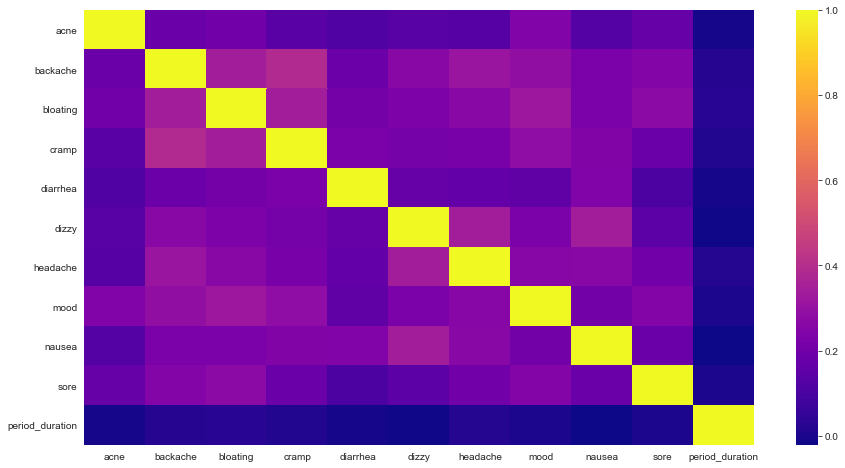

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='plasma')

No interesting correlations found as such.

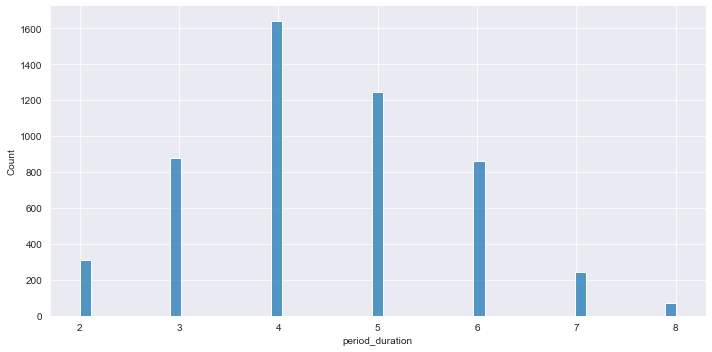

In [39]:
sns.displot(df['period_duration'], aspect=2)

#### Observation
- Most of the users from our cleaned dataset reported a period duration of 4 days.

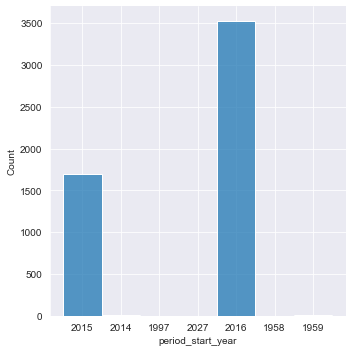

In [40]:
sns.displot(df['period_start_year'])

There are some rows which contain irregular values of 'period_start_year' such as 1958, 1959, 2027 and so on. Let's remove these.

In [41]:
df['period_start_year'].value_counts()

2016    3524
2015    1700
2014      15
1959       8
1958       1
2027       1
1997       1
Name: period_start_year, dtype: int64

In [42]:
df['period_start_year'].isin(['2014', '2015', '2016']).value_counts()

True     5239
False      11
Name: period_start_year, dtype: int64

In [43]:
df = df[df['period_start_year'].isin(['2014', '2015', '2016'])]
df

,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,period_duration,period_start_year,period_start_month,period_start_day
0,0,0,0,0,0,0,0,0,0,55,4,2015,03,23
1,29,99,27,0,0,78,36,0,65,100,3,2015,03,21
2,51,100,27,0,0,75,28,0,70,100,5,2015,03,26
3,0,0,0,0,0,0,0,0,0,0,4,2015,03,13
4,0,0,0,0,0,0,0,0,0,0,7,2015,03,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,0,0,28,0,0,0,0,17,0,38,7,2016,09,16
5246,0,0,0,0,0,0,36,0,0,13,5,2016,06,20
5247,0,0,0,0,0,0,36,0,0,13,5,2016,06,20
5248,0,0,0,68,0,0,0,0,0,0,5,2016,07,21


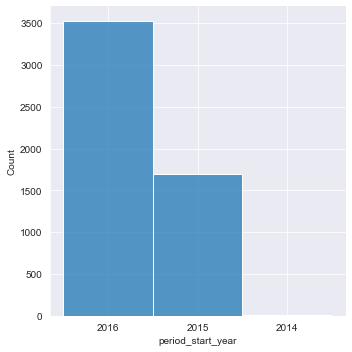

In [44]:
sns.displot(df['period_start_year'].sort_values(ascending=False))

#### Observation
- Most of the users at the time of reporting stated that the particular period started in the year 2016, almost twice as much as that of year 2015. 

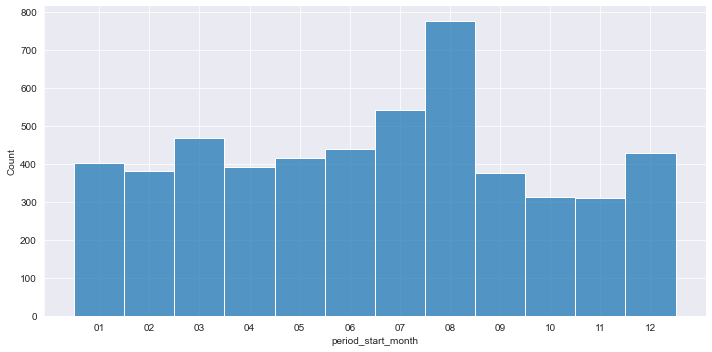

In [45]:
sns.displot(df['period_start_month'].sort_values(), aspect=2)

#### Observation
- The maximum number of reported periods had started in the month of August.

In [46]:
df.head()

,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,period_duration,period_start_year,period_start_month,period_start_day
0,0,0,0,0,0,0,0,0,0,55,4,2015,03,23
1,29,99,27,0,0,78,36,0,65,100,3,2015,03,21
2,51,100,27,0,0,75,28,0,70,100,5,2015,03,26
3,0,0,0,0,0,0,0,0,0,0,4,2015,03,13
4,0,0,0,0,0,0,0,0,0,0,7,2015,03,17


<AxesSubplot:xlabel='period_duration', ylabel='acne'>

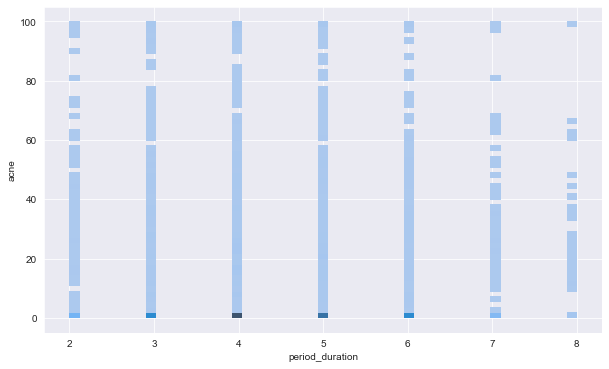

In [47]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='period_duration', y='acne')

#### Observation
- We can see that a lesser number of users reported severe symptoms of acne for a period duration of 7 and 8 days.

<AxesSubplot:xlabel='period_duration', ylabel='bloating'>

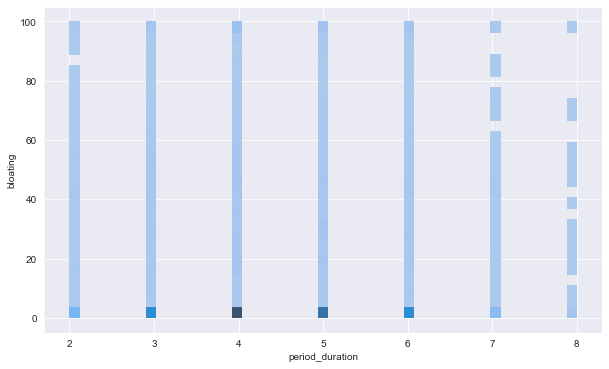

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='period_duration', y='bloating')

#### Observation
- Very few users who had a period duration of 8 days reported severe symptoms of bloating.

<AxesSubplot:xlabel='period_duration', ylabel='diarrhea'>

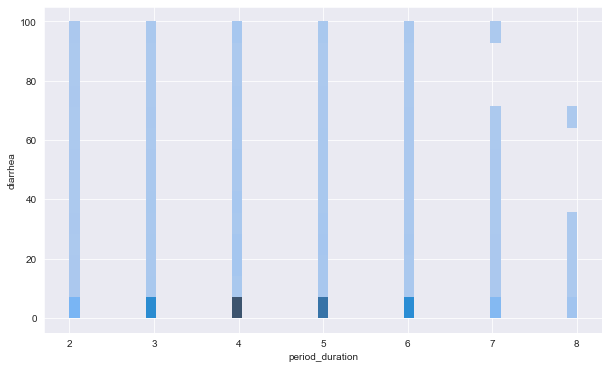

In [49]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='period_duration', y='diarrhea')

<AxesSubplot:xlabel='period_duration', ylabel='dizzy'>

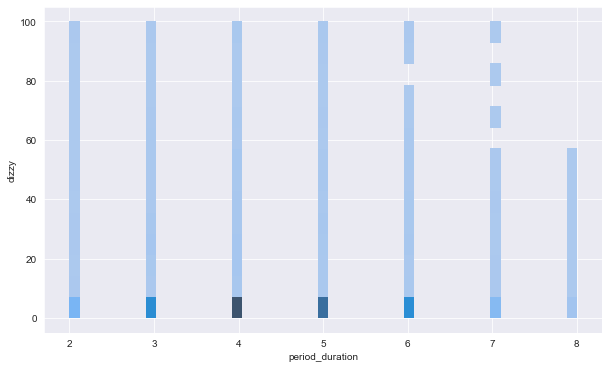

In [50]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='period_duration', y='dizzy')

<AxesSubplot:xlabel='period_duration', ylabel='nausea'>

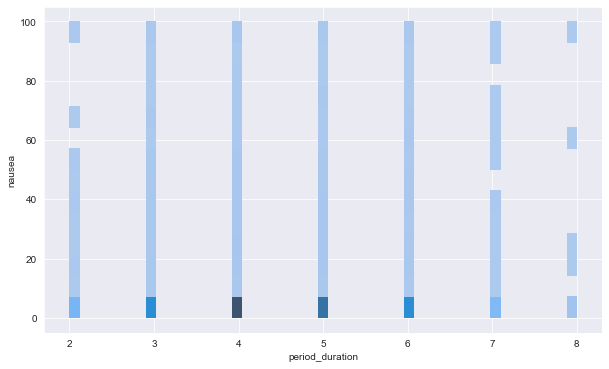

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='period_duration', y='nausea')

<AxesSubplot:xlabel='period_duration', ylabel='sore'>

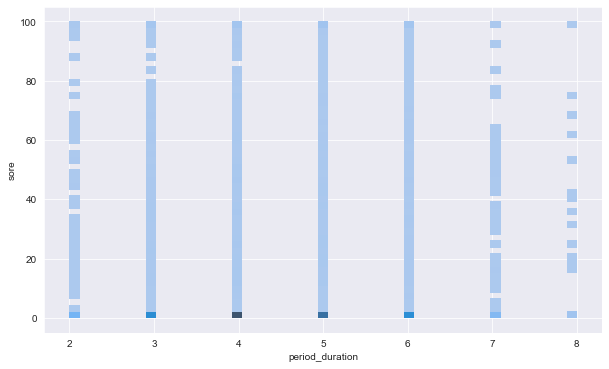

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='period_duration', y='sore')

#### Observation
- Generally, we do see a trend here in most of the symptoms. Users with a period duration of 7 or 8 days suffer from less severe symptoms.

## Conclusion

This brings us to the end of this mini-project. We were able to come up with some interesting insights after doing quite a bit of data cleaning and feature creation. Summing up the observations below:

1. The mean severity recorded is the highest for cramps.
2. At least half the number of people did not suffer from any of the given symptoms as the median value is 0 for all symptoms.
3. Most of the users from our cleaned dataset reported a period duration of 4 days.
4. Most of the users at the time of reporting stated that the particular period started in the year 2016, almost twice as much as that of year 2015.
5. The maximum number of reported periods had started in the month of August.
6. A lesser number of users reported severe symptoms of acne for a period duration of 7 and 8 days.
7. Very few users who had a period duration of 8 days reported severe symptoms of bloating. Generally, users with a period duration of 7 or 8 days suffer from less severe symptoms.